In [1]:
import pandas as pd
from preprocessing import set_discrete_columns, remove_outliers
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/cardio_train.csv", sep=";", index_col=0)
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df = remove_outliers(df, ["ap_hi", "ap_lo", "weight", "height"], 3)
df = remove_outliers(df, ["ap_hi", "ap_lo"], 5)

In [5]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000,67078.000000
mean,19466.134575,1.346999,164.371672,73.556404,126.435076,81.247264,1.361877,1.223292,0.087242,0.053147,0.804019,0.492293
std,2467.750306,0.476019,7.688308,13.189444,16.506380,9.381481,0.677049,0.569191,0.282191,0.224328,0.396957,0.499944
min,10798.000000,1.000000,140.000000,32.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17659.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,117.000000,215.000000,130.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df, new_df = set_discrete_columns(df, ["height", "weight", "ap_hi", "ap_lo"])

In [7]:
new_df

{'height': ['(139.952, 146.857]',
  '(146.857, 153.714]',
  '(153.714, 160.571]',
  '(160.571, 167.429]',
  '(167.429, 174.286]',
  '(174.286, 181.143]',
  '(181.143, 188.0]'],
 'weight': ['(31.915, 38.071]',
  '(38.071, 44.143]',
  '(44.143, 50.214]',
  '(50.214, 56.286]',
  '(56.286, 62.357]',
  '(62.357, 68.429]',
  '(68.429, 74.5]',
  '(74.5, 80.571]',
  '(80.571, 86.643]',
  '(86.643, 92.714]',
  '(92.714, 98.786]',
  '(98.786, 104.857]',
  '(104.857, 110.929]',
  '(110.929, 117.0]'],
 'ap_hi': ['(59.845, 75.5]',
  '(75.5, 91.0]',
  '(91.0, 106.5]',
  '(106.5, 122.0]',
  '(122.0, 137.5]',
  '(137.5, 153.0]',
  '(153.0, 168.5]',
  '(168.5, 184.0]',
  '(184.0, 199.5]',
  '(199.5, 215.0]'],
 'ap_lo': ['(39.91, 51.25]',
  '(51.25, 62.5]',
  '(62.5, 73.75]',
  '(73.75, 85.0]',
  '(85.0, 96.25]',
  '(96.25, 107.5]',
  '(107.5, 118.75]',
  '(118.75, 130.0]']}

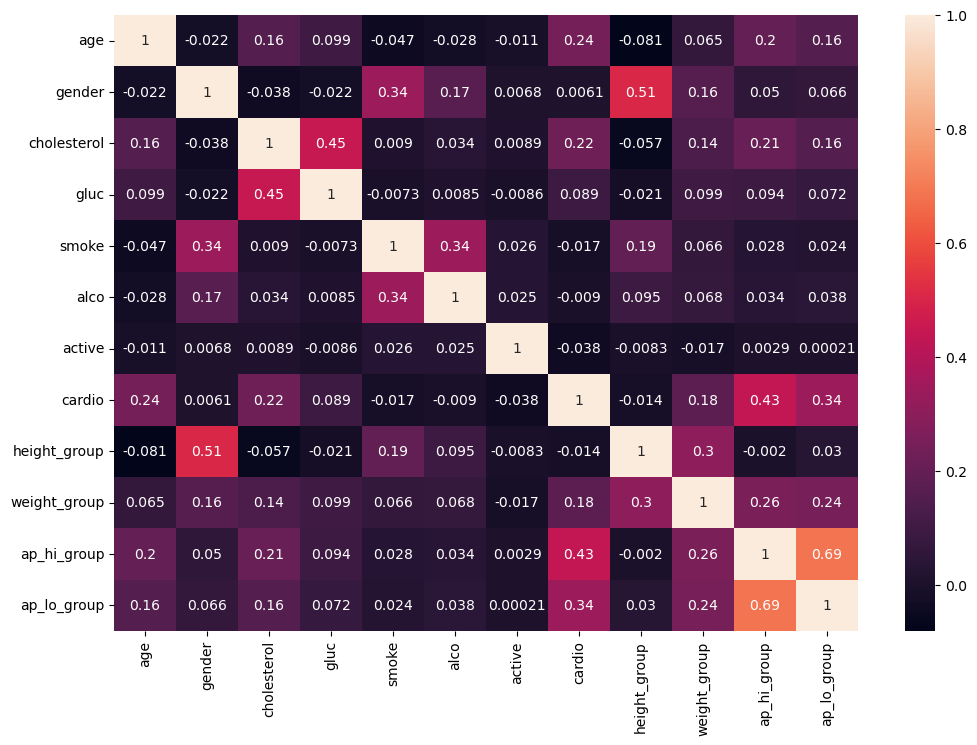

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()